# **Decision Tree Classifier**

## **Decision Tree Classifier with Post Pruning**

### it is used for small datasets

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import dataset from sklearn
from sklearn.datasets import load_iris

In [4]:
dataset = load_iris()

In [5]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
#another way to import similar dataset
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#dataset contain the target values like species from 'df'
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
#independent and dependent freatures
X = df.iloc[:,:-1]
y = dataset.target

In [9]:
X, y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
#create the train and test dataset
from sklearn.model_selection import train_test_split

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 47)

In [11]:
X_train.shape, X_test.shape

((100, 4), (50, 4))

In [12]:
#import the model
from sklearn.tree import DecisionTreeClassifier

#create the post pruning
treeclassifier = DecisionTreeClassifier()

In [13]:
treeclassifier.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(334.8, 489.24, 'X[3] <= 0.8\ngini = 0.658\nsamples = 100\nvalue = [30, 41, 29]'),
 Text(251.10000000000002, 380.52000000000004, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(418.5, 380.52000000000004, 'X[2] <= 5.05\ngini = 0.485\nsamples = 70\nvalue = [0, 41, 29]'),
 Text(167.4, 271.8, 'X[3] <= 1.65\ngini = 0.165\nsamples = 44\nvalue = [0, 40, 4]'),
 Text(83.7, 163.08000000000004, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(251.10000000000002, 163.08000000000004, 'X[1] <= 2.9\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(167.4, 54.360000000000014, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(334.8, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(669.6, 271.8, 'X[3] <= 1.7\ngini = 0.074\nsamples = 26\nvalue = [0, 1, 25]'),
 Text(585.9, 163.08000000000004, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(502.20000000000005, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(669.6

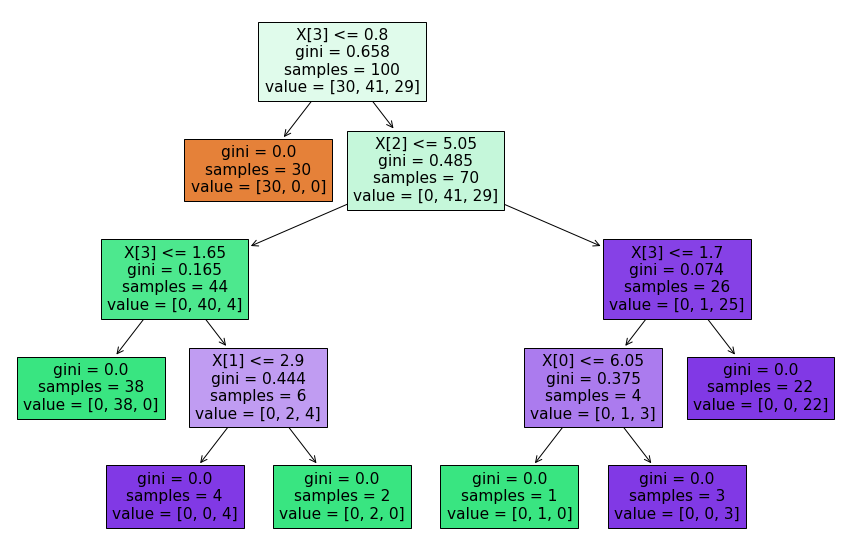

In [14]:
#import the tree for visualize the actual way of pruining
from sklearn import tree

#create the figure
plt.figure(figsize = (15, 10))
tree.plot_tree(treeclassifier, filled = True)

But as we see that this tree is large, it means it has large max depth value which is not required as we can convert or predict the value with only max_depth = 2
so, we can remove the other tree

So, now post pruining the model with max_depth = 2

In [15]:
#post pruning with max_depth = 2
treeclassifier = DecisionTreeClassifier(max_depth = 2)

#fit the model
treeclassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 453.0, 'X[3] <= 0.8\ngini = 0.658\nsamples = 100\nvalue = [30, 41, 29]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(502.20000000000005, 271.8, 'X[3] <= 1.75\ngini = 0.485\nsamples = 70\nvalue = [0, 41, 29]'),
 Text(334.8, 90.59999999999997, 'gini = 0.165\nsamples = 44\nvalue = [0, 40, 4]'),
 Text(669.6, 90.59999999999997, 'gini = 0.074\nsamples = 26\nvalue = [0, 1, 25]')]

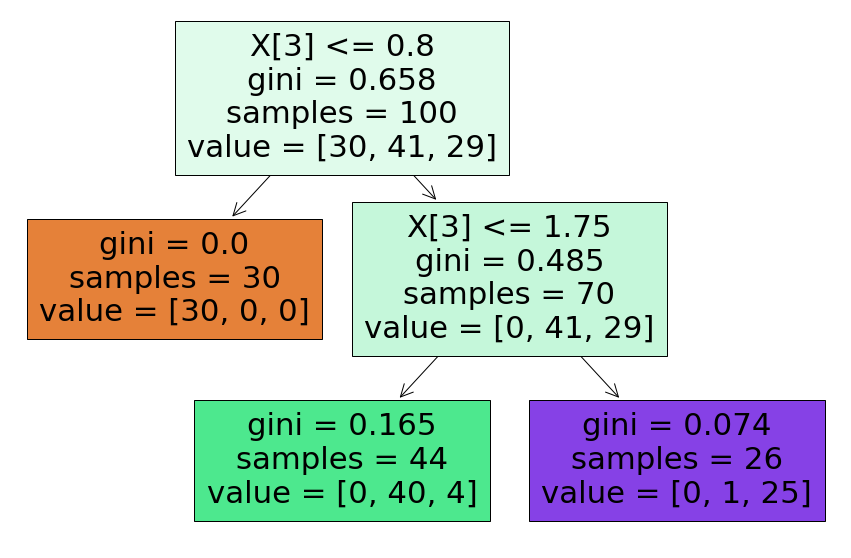

In [16]:
#visualize the tree
plt.figure(figsize = (15, 10))
tree.plot_tree(treeclassifier, filled = True)

In [17]:
#create the prediction with max_depth = 2
y_pred = treeclassifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1,
       2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 0, 2, 2])

In [18]:
#finding the performance matrix like accuracy score and classification report
from sklearn.metrics import accuracy_score, classification_report

In [19]:
#create the metrics
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.90      0.95        10
           2       0.95      1.00      0.98        20

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.97        50
weighted avg       0.98      0.98      0.98        50



## **Decision Tree Classifier with Pre Pruning and Hyper Parameter Tuning**

### it is used for big datasets

In [21]:
#import the warnings
import warnings
warnings.filterwarnings("ignore")

In [22]:
parameter = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : [1, 2, 3, 4, 5],
    "max_features" : ["auto", "sqrt", "log2"]
}

In [23]:
#import the gridsearchcv
from sklearn.model_selection import GridSearchCV

#define the model
treeclassifier = DecisionTreeClassifier()
clf = GridSearchCV(treeclassifier, param_grid = parameter, cv = 5, scoring = "accuracy")

In [24]:
#fit the model with train data
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [25]:
#finding the best parameters
clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'splitter': 'best'}

In [28]:
#predict with best params
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1,
       2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 0, 2, 2])

In [29]:
#finding the accuracy
score = accuracy_score(y_pred, y_test)
score

0.98

In [30]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.90      0.95        10
           2       0.95      1.00      0.98        20

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.97        50
weighted avg       0.98      0.98      0.98        50

